In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Decision Tree'

In [95]:
my_data=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Telecust1.csv')
my_data[0:5]

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [96]:
my_data.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [97]:
X=my_data[['tenure','age','income']]
X[0:5]

,tenure,age,income
0,13,44,64
1,11,33,136
2,68,52,116
3,33,33,33
4,23,30,30


In [98]:
y=my_data[['custcat']]
y[0:5]

,custcat
0,A
1,D
2,C
3,A
4,C


In [99]:
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.7,random_state=3)

In [100]:
custTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
custTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
predTree=custTree.predict(X_testset)
print(predTree[0:5])
print(y_testset[0:5])

['A' 'A' 'C' 'C' 'B']
    custcat
642       C
762       C
909       A
199       D
586       A


In [102]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("The accuracy is : ",metrics.accuracy_score(y_testset,predTree))

The accuracy is :  0.31


In [103]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

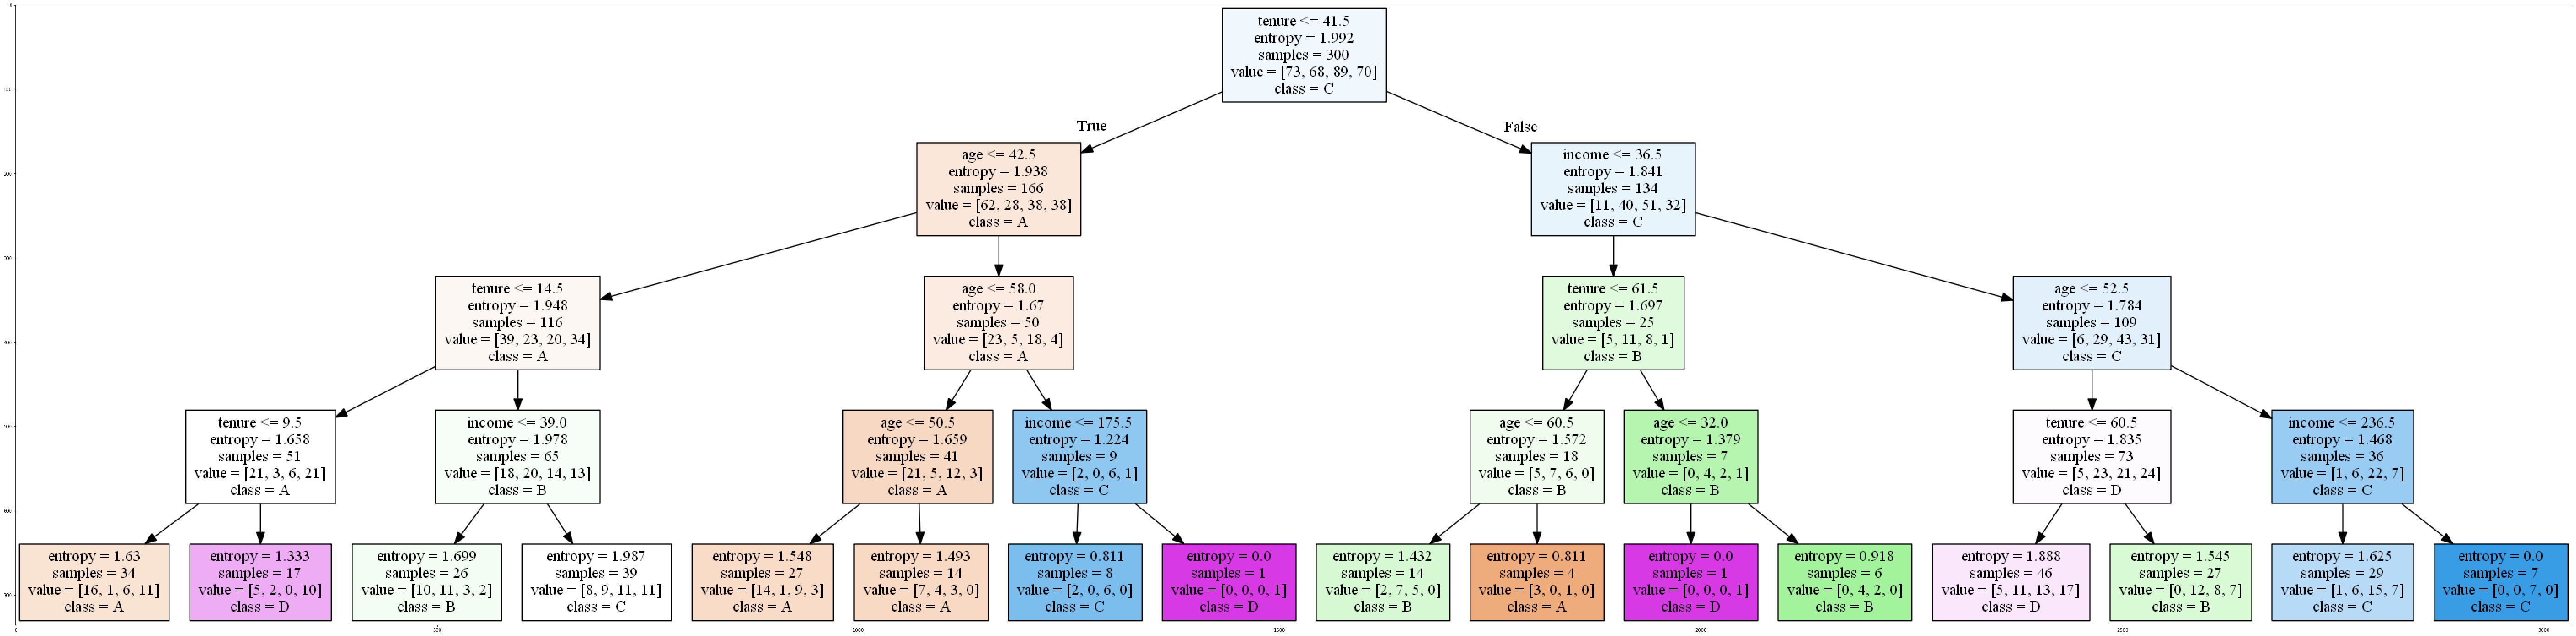

In [120]:
dot_data=StringIO()
filename='CustTree.png'
featureNames=my_data.columns[1:4]
targetNames=my_data["custcat"].unique().tolist()
out=tree.export_graphviz(custTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=False,rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')
plt.show()               